In [88]:
import extcolors
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

def kmeansColorCluster(image, clusters, rounds):
        """
        Parameters
            image <np.ndarray> : 이미지
            clusters <int> : 클러스터 개수 (군집화 개수)
            rounds <int> : 알고리즘을 몇 번 실행할지 (보통 1)
        returns
            clustered Image <np.ndarray> : 결과 이미지
            SSE <float> : 오차 제곱 합
        """
        
        height, width = image.shape[:2]
        samples = np.zeros([ height * width, 3 ], dtype=np.float32)
        
        count = 0
        for x in range(height):
            for y in range(width):
                samples[count] = image[x][y]
                count += 1
        
        '''
        # compactness : SSE = 오차 제곱 합
        # labels : 레이블 배열 (0과 1로 표현)
        # centers : 클러스터 중심 좌표 (k개로 군집화된 색상들)
        '''
        compactness, labels, centers = cv2.kmeans(
                    samples, # 비지도 학습 데이터 정렬
                    clusters, # 군집화 개수
                    None, # 각 샘플의 군집 번호 정렬
                    # criteria : kmeans 알고리즘 반복 종료 기준 설정
                    criteria = (cv2.TERM_CRITERIA_MAX_ITER, 
                                5000, # max_iter 
                                0.0001), # epsilon 
                    # attempts : 다른 초기 중앙값을 이용해 반복 실행할 횟수
                    attempts = rounds, 
                    # flags : 초기 중앙값 설정 방법
                    flags = cv2.KMEANS_PP_CENTERS)
        
        centers = np.uint8(centers)
        res = centers[labels.flatten()]
        
        # 결과 이미지, 초기 중앙값, 오차제곱합 반환
        return res.reshape((image.shape))   


# 사실상 메인함수 (path -> image의 대표색상 어레이(,3))
def extract_colors(path):
    image = Image.open(path)
    #image = kmeansColorCluster(np.array(image), 7, 1)
    #image = Image.fromarray(image)
    
    # 이미지 자르기 crop함수 이용 ex. crop(left,up, rigth, down)
    croppedImage=image.crop((10,10,100,100))
    image1 = image.crop((40,400,660,650))

    colors_c, _ = extcolors.extract_from_image(croppedImage)
    colors, _ =  extcolors.extract_from_image(image1)

    color_list = [i[0] for i in colors if i[0] != colors_c[0][0]]
    color_arr = np.array(color_list)
    return color_arr

def _color_to_pic(color, size=(32, 32)):
    color_arr = [color for i in range(size[1])]
    color_arr = [color_arr for i in range(size[0])]
    color_arr = np.array(color_arr)
    return color_arr
 
# [[r, g, b], ..., [r, g, b]] -> palette (이 파일에서만 쓸 것 같음)
def print_palette(color_arr):
    n = len(color_arr)
    for i, color in enumerate(color_arr):
        arrayToImage = Image.fromarray(_color_to_pic(color), mode='RGB')
        plt.subplot(1, n, i+1)
        plt.imshow(_color_to_pic(color))





In [89]:
"""
path_format = "selenium_crawling/image/image_{}.jpg"
result = []
for i in range(1, 1201):
    result.append(extract_colors(path_format.format(i)))
"""

In [90]:
result = np.array(result, dtype=object)

In [91]:
result.shape

(1200,)

In [92]:
count = 0
idx = []
for id, i in enumerate(result):
    if len(i) == 1:
        count += 1
        idx.append(id+1)
print(count)
print(idx)

75
[26, 34, 50, 53, 54, 67, 96, 114, 116, 131, 133, 134, 155, 187, 204, 209, 228, 257, 259, 294, 315, 318, 345, 357, 378, 381, 412, 417, 430, 437, 438, 440, 447, 499, 531, 538, 545, 557, 560, 577, 624, 660, 668, 686, 696, 697, 718, 720, 731, 738, 801, 809, 830, 848, 850, 875, 876, 914, 919, 955, 970, 984, 986, 993, 1006, 1034, 1040, 1063, 1074, 1078, 1080, 1090, 1111, 1127, 1186]


In [93]:
result[49].shape

(1, 3)

In [122]:
import pandas as pd

data = pd.read_csv("selenium_crawling/data.csv", index_col= 0)
data.head()

,title,img_path,hashtag
1,매일 입을래,./image/image_1.jpg,"['봄', '캐주얼', '긴소매 티셔츠', '데님 팬츠', '마르디 메크르디 슈즈'..."
2,센스 있는 조합,./image/image_2.jpg,"['봄', '캐주얼', '긴소매 티셔츠', '데님 팬츠', '마뗑킴', '스타디움 ..."
3,매력 만점,./image/image_3.jpg,"['봄', '캐주얼', '데님 팬츠', '메타버스', '반원 아틀리에', '블루종/..."
4,우아한 자태,./image/image_4.jpg,"['로맨틱', '봄', '데님 팬츠', '루시크루', '룩캐스트', '목걸이/펜던트..."
5,워너비 스타일,./image/image_5.jpg,"['걸리시', '봄', '귀걸이', '낫노잉', '니트/스웨터', '로씨로씨', '..."


In [95]:
data['colors'] = result
data.head()

,title,img_path,hashtag,colors
1,매일 입을래,./image/image_1.jpg,"['봄', '캐주얼', '긴소매 티셔츠', '데님 팬츠', '마르디 메크르디 슈즈'...","[[114, 114, 114], [228, 163, 121], [27, 27, 29..."
2,센스 있는 조합,./image/image_2.jpg,"['봄', '캐주얼', '긴소매 티셔츠', '데님 팬츠', '마뗑킴', '스타디움 ...","[[34, 34, 22], [102, 116, 117], [36, 21, 54]]"
3,매력 만점,./image/image_3.jpg,"['봄', '캐주얼', '데님 팬츠', '메타버스', '반원 아틀리에', '블루종/...","[[56, 62, 76], [243, 236, 226], [109, 46, 54],..."
4,우아한 자태,./image/image_4.jpg,"['로맨틱', '봄', '데님 팬츠', '루시크루', '룩캐스트', '목걸이/펜던트...","[[46, 45, 53], [106, 119, 151]]"
5,워너비 스타일,./image/image_5.jpg,"['걸리시', '봄', '귀걸이', '낫노잉', '니트/스웨터', '로씨로씨', '...","[[26, 26, 26], [166, 105, 136], [92, 12, 47], ..."


In [96]:
data.index = [i-1 for i in data.index]

In [97]:
data.head()

,title,img_path,hashtag,colors
0,매일 입을래,./image/image_1.jpg,"['봄', '캐주얼', '긴소매 티셔츠', '데님 팬츠', '마르디 메크르디 슈즈'...","[[114, 114, 114], [228, 163, 121], [27, 27, 29..."
1,센스 있는 조합,./image/image_2.jpg,"['봄', '캐주얼', '긴소매 티셔츠', '데님 팬츠', '마뗑킴', '스타디움 ...","[[34, 34, 22], [102, 116, 117], [36, 21, 54]]"
2,매력 만점,./image/image_3.jpg,"['봄', '캐주얼', '데님 팬츠', '메타버스', '반원 아틀리에', '블루종/...","[[56, 62, 76], [243, 236, 226], [109, 46, 54],..."
3,우아한 자태,./image/image_4.jpg,"['로맨틱', '봄', '데님 팬츠', '루시크루', '룩캐스트', '목걸이/펜던트...","[[46, 45, 53], [106, 119, 151]]"
4,워너비 스타일,./image/image_5.jpg,"['걸리시', '봄', '귀걸이', '낫노잉', '니트/스웨터', '로씨로씨', '...","[[26, 26, 26], [166, 105, 136], [92, 12, 47], ..."


In [98]:
data.to_csv('data_with_colors.csv', sep=',', na_rep='NaN')

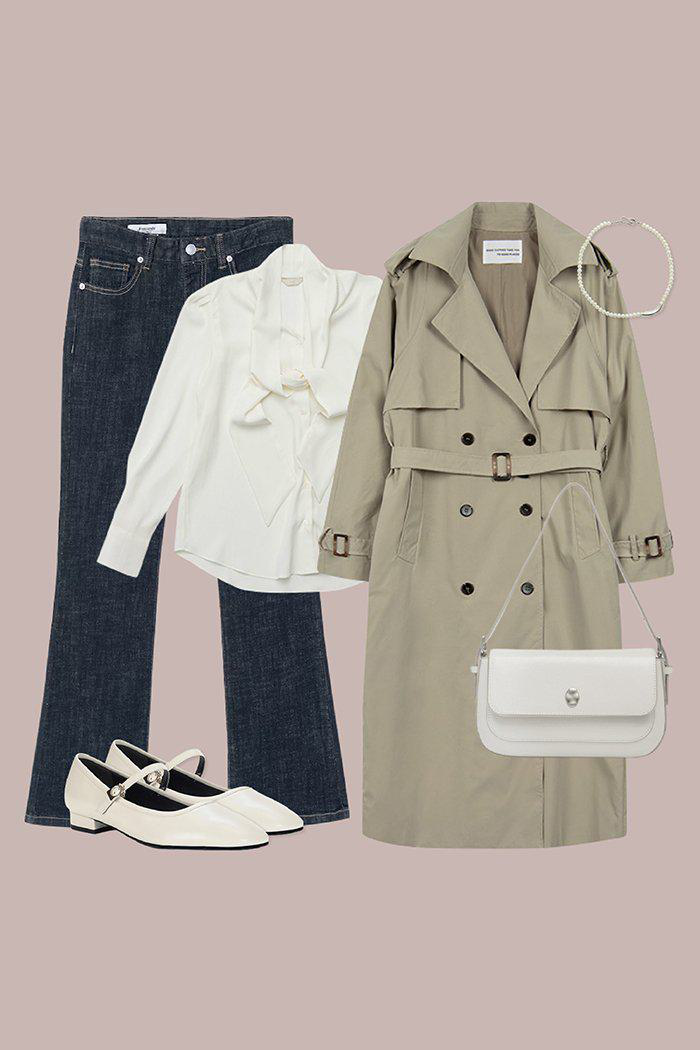

In [121]:
Image.open("selenium_crawling/image/image_35.jpg")

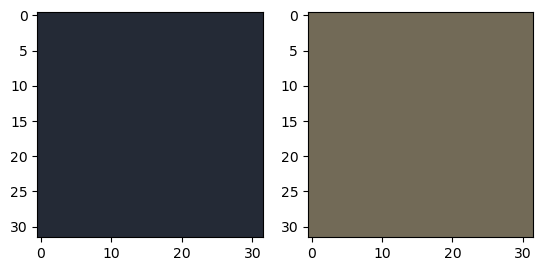

In [120]:
print_palette(result[34])

In [4]:
data = pd.read_csv('data_with_colors.csv', index_col=0)
data.head()

,title,img_path,hashtag,colors
0,매일 입을래,./image/image_1.jpg,"['봄', '캐주얼', '긴소매 티셔츠', '데님 팬츠', '마르디 메크르디 슈즈'...",[[114 114 114]\r\n [228 163 121]\r\n [ 27 27 ...
1,센스 있는 조합,./image/image_2.jpg,"['봄', '캐주얼', '긴소매 티셔츠', '데님 팬츠', '마뗑킴', '스타디움 ...",[[ 34 34 22]\r\n [102 116 117]\r\n [ 36 21 ...
2,매력 만점,./image/image_3.jpg,"['봄', '캐주얼', '데님 팬츠', '메타버스', '반원 아틀리에', '블루종/...",[[ 56 62 76]\r\n [243 236 226]\r\n [109 46 ...
3,우아한 자태,./image/image_4.jpg,"['로맨틱', '봄', '데님 팬츠', '루시크루', '룩캐스트', '목걸이/펜던트...",[[ 46 45 53]\r\n [106 119 151]]
4,워너비 스타일,./image/image_5.jpg,"['걸리시', '봄', '귀걸이', '낫노잉', '니트/스웨터', '로씨로씨', '...",[[ 26 26 26]\r\n [166 105 136]\r\n [ 92 12 ...


In [5]:
def str_to_list(text):
    text = text.rstrip(']').lstrip('[').split(',')
    text = list(map(lambda x: x.lstrip(" '").rstrip("'"), text))
    return text

In [6]:
hashtag = np.array(list(map(str_to_list, data.hashtag.values)), dtype = object)

In [7]:
hashtag[0]

['봄',
 '캐주얼',
 '긴소매 티셔츠',
 '데님 팬츠',
 '마르디 메크르디 슈즈',
 '맥끌라니',
 '바우프',
 '숄더백',
 '인스턴트펑크',
 '조거쉬',
 '캔버스/단화',
 '캡/야구 모자',
 '후드 집업',
 '꾸안꾸',
 '컬러블록',
 '레터링',
 '워싱',
 '그래픽',
 '부츠컷']

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [9]:
def del_slash_space(text_arr):
    for i, text in enumerate(text_arr):
        if '/' in text:
            t = text_arr.pop(i)
            t = list(t.split('/'))
            text_arr+t
    return text_arr        

In [10]:
print(del_slash_space(hashtag[0]))

['봄', '캐주얼', '긴소매 티셔츠', '데님 팬츠', '마르디 메크르디 슈즈', '맥끌라니', '바우프', '숄더백', '인스턴트펑크', '조거쉬', '캡/야구 모자', '후드 집업', '꾸안꾸', '컬러블록', '레터링', '워싱', '그래픽', '부츠컷']


In [11]:
hashtag = list(map(del_slash_space, hashtag))

In [12]:
hashtag

[['봄',
  '캐주얼',
  '긴소매 티셔츠',
  '데님 팬츠',
  '마르디 메크르디 슈즈',
  '맥끌라니',
  '바우프',
  '숄더백',
  '인스턴트펑크',
  '조거쉬',
  '후드 집업',
  '꾸안꾸',
  '컬러블록',
  '레터링',
  '워싱',
  '그래픽',
  '부츠컷'],
 ['봄',
  '캐주얼',
  '긴소매 티셔츠',
  '데님 팬츠',
  '마뗑킴',
  '스타디움 재킷',
  '아디다스',
  '에이프릴에잇',
  '토트백',
  '판도라핏',
  '패션스니커즈화',
  '컬러블록',
  '스티치',
  '래글런',
  '레터링',
  '워싱'],
 ['봄',
  '캐주얼',
  '데님 팬츠',
  '메타버스',
  '반원 아틀리에',
  '에코백',
  '척',
  '파이비',
  '패션스니커즈화',
  '헤인트',
  '후드 티셔츠',
  '휴대폰 케이스',
  '알고리즘',
  '로고플레이',
  '레터링',
  '크롭'],
 ['로맨틱',
  '봄',
  '데님 팬츠',
  '루시크루',
  '룩캐스트',
  '밸럽',
  '숄더백',
  '엽페',
  '와르',
  '폴브리알',
  '데이트',
  '소개팅',
  '트위드',
  '부츠컷',
  '워싱'],
 ['걸리시',
  '봄',
  '귀걸이',
  '낫노잉',
  '로씨로씨',
  '마지셔우드',
  '미니스커트',
  '부츠',
  '숄더백',
  '스윙셋',
  '스타디움 재킷',
  '에이티티',
  '키르시',
  '여친룩',
  '짧치',
  '컬러포인트',
  '크롭',
  '플라워'],
 ['골프',
  '봄',
  '골프가방',
  '골프화',
  '니티나',
  '데상트 골프',
  '마르디 메크르디 악티프',
  '와이드앵글',
  '일자 팬츠',
  '장갑',
  '크리션',
  '트레이닝 재킷',
  '부츠컷',
  '심볼',
  '스포티'],
 ['골프',
  '봄',
  '골프가방',
  '골프화',
  '마틴골프',
  '말

In [13]:
def list_to_text(list_of_words):
    result = ""
    for word in list_of_words:
        result = result + " " + word
    return result    

In [14]:
hashtag_t = list(map(list_to_text, hashtag))

In [15]:
hashtag_t

[' 봄 캐주얼 긴소매 티셔츠 데님 팬츠 마르디 메크르디 슈즈 맥끌라니 바우프 숄더백 인스턴트펑크 조거쉬 후드 집업 꾸안꾸 컬러블록 레터링 워싱 그래픽 부츠컷',
 ' 봄 캐주얼 긴소매 티셔츠 데님 팬츠 마뗑킴 스타디움 재킷 아디다스 에이프릴에잇 토트백 판도라핏 패션스니커즈화 컬러블록 스티치 래글런 레터링 워싱',
 ' 봄 캐주얼 데님 팬츠 메타버스 반원 아틀리에 에코백 척 파이비 패션스니커즈화 헤인트 후드 티셔츠 휴대폰 케이스 알고리즘 로고플레이 레터링 크롭',
 ' 로맨틱 봄 데님 팬츠 루시크루 룩캐스트 밸럽 숄더백 엽페 와르 폴브리알 데이트 소개팅 트위드 부츠컷 워싱',
 ' 걸리시 봄 귀걸이 낫노잉 로씨로씨 마지셔우드 미니스커트 부츠 숄더백 스윙셋 스타디움 재킷 에이티티 키르시 여친룩 짧치 컬러포인트 크롭 플라워',
 ' 골프 봄 골프가방 골프화 니티나 데상트 골프 마르디 메크르디 악티프 와이드앵글 일자 팬츠 장갑 크리션 트레이닝 재킷 부츠컷 심볼 스포티',
 ' 골프 봄 골프가방 골프화 마틴골프 말본 골프 미니스커트 아노락 재킷 장갑 카렘 크리브나인 로고플레이 플리츠 뉴트럴톤 스포티 테니스 태슬 컬러블록',
 ' 골프 봄 기타 모자 긴소매 티셔츠 데님 팬츠 라코스테 장갑 카디건 투어골프 포트메인 플레이부 에이오더블유 부츠컷 스포티 심볼',
 ' 골프 봄 골프가방 골프화 나이키 골프 니트/스웨터 더블플래그 마르제 먼데이플로우 미니스커트 장갑 페어라이어 골프 폴로 랄프 로렌 골프 플리츠 테니스 심볼 스포티',
 ' 골프 봄 골프가방 골프화 그리니치 마로 골프 스타디움 재킷 일자 팬츠 플래토 휠라 골프 에이븐 뉴트럴톤 컬러블록 스포티 로고플레이',
 ' 봄 캐주얼 데님 팬츠 모드나인 백팩 세인트페인 스타디움 재킷 아메스 월드와이드 에이카화이트 캡/야구 모자 코닥 포즈간츠 컬러블록 레터링 그래픽 워싱 캠퍼스 꾸안꾸',
 ' 댄디 봄 구두 데님 팬츠 도프제이슨 로맨틱무브 모드나인 에이징씨씨씨 엘무드 하 아카이브 레더 컬러블록 워싱 데이트',
 ' 봄 캐주얼 기

In [30]:
tokenizer = Tokenizer(num_words = 400)
tokenizer.fit_on_texts(hashtag_t)
tokenizer.word_counts

OrderedDict([('봄', 475),
             ('캐주얼', 505),
             ('긴소매', 131),
             ('티셔츠', 375),
             ('데님', 403),
             ('팬츠', 702),
             ('마르디', 13),
             ('메크르디', 13),
             ('슈즈', 15),
             ('맥끌라니', 3),
             ('바우프', 10),
             ('숄더백', 167),
             ('인스턴트펑크', 9),
             ('조거쉬', 11),
             ('후드', 278),
             ('집업', 37),
             ('꾸안꾸', 223),
             ('컬러블록', 291),
             ('레터링', 260),
             ('워싱', 178),
             ('그래픽', 164),
             ('부츠컷', 63),
             ('마뗑킴', 14),
             ('스타디움', 123),
             ('재킷', 245),
             ('아디다스', 56),
             ('에이프릴에잇', 1),
             ('토트백', 100),
             ('판도라핏', 5),
             ('패션스니커즈화', 198),
             ('스티치', 51),
             ('래글런', 24),
             ('메타버스', 2),
             ('반원', 8),
             ('아틀리에', 8),
             ('에코백', 45),
             ('척', 18),
             ('파이비', 1

In [31]:
word_sequences = tokenizer.texts_to_sequences(hashtag_t)

In [32]:
len(word_sequences)

1200

In [33]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_word_sequences = pad_sequences(word_sequences)

In [34]:
padded_word_sequences

array([[  0,   0,   0, ...,  24,  27,  75],
       [  0,   0,   0, ..., 161,  13,  24],
       [  0,   0,   0, ...,   7,  13,  59],
       ...,
       [  0,   0,   0, ...,  12,  14,  17],
       [  0,   0,   0, ...,  13,  19, 234],
       [  0,   0,   0, ...,  96,  78,  23]], dtype=int32)

In [36]:
test_sentences = [
    ""
]

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_sequences = pad_sequences(test_sequences, maxlen= len(padded_word_sequences[0]))
print(test_sequences)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17
   4 43]]
